<a href="https://colab.research.google.com/github/medikid/ai_lotto/blob/master/notebooks/model_trainer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Initiate Collab Notebook and setup Google Drive**

## Mount Google Drive

In [ ]:
#init colab notebooks

from google.colab import drive
drive.mount('/content/g_drive')

In [ ]:
#perform all actions at once
#!mkdir my_drive
!ln -s "/content/g_drive/My Drive/Colab/Datascience/ai_lotto" "/content"
%cd "/content/ai_lotto"

import sys
sys.path.append('/content/ai_lotto')
%cd notebooks/

%run 'db/__init__.py'
%run 'db/base.py'
%run 'db/db_base.py'
%run 'db/utils.py'
%run 'db/models/training_session.py'
%run 'db/models/training_log.py'

%run '../ifile.py'
%run '../idata.py'
%run '../idataset.py'
%run '../imodel.py'
%run '../ker_model.py'
%run '../ker_model_loader.py'
%run '../tfl_model.py'
%run '../ai.py'
%run '../itrainer.py'
%run '../custom_functions.py'
%run '../custom_callbacks.py'

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#!mkdir my_drive
!ln -s "/content/g_drive/My Drive/Colab/Datascience/ai_lotto" "/content"

In [ ]:
%cd "/content/ai_lotto"

import sys
sys.path.append('/content/ai_lotto')

In [ ]:
%cd notebooks/

# GIthub Functions

## Git ADD, COMMIT and PUSH to remote

In [ ]:
!git add -A .
!git commit -m "Added git functions"
!git push origin master

## Git Pull from remote github repo

In [ ]:
!git pull

## Git conflict local - so reset local to match remote

In [ ]:
!git fetch --all
!git reset --hard origin/master
!git pull

## Unpushed local changes - Stash local, Pull Remote and write local changes to pulled remote

In [ ]:
!git stash
!git pull
!git stash pop

## Setup git config repo

In [ ]:
#!git config --global user.email "soma.programmer@gmail.com"
#!git config --global user.name "medikid"

#!git remote set-url origin https://github.com/medikid/ai_lotto.git


In [ ]:
!git remote show origin

# lists all classes in the order of loading

In [ ]:
!pip install -r ../requirements.txt

In [1]:
# %load '../load_lib.py'

%run '../ifile.py'
%run '../idata.py'
%run '../idataset.py'
%run '../imodel.py'
%run '../ker_model.py'
%run '../ker_model_loader.py'
%run '../tfl_model.py'
%run '../ai.py'
%run '../itrainer.py'
%run '../custom_functions.py'
%run '../custom_callbacks.py'

%run 'db/__init__.py'
%run 'db/base.py'
%run 'db/db_base.py'
%run 'db/utils.py'
%run 'db/models/training_session.py'
%run 'db/models/training_log.py'



Using TensorFlow backend.


Setting up sqlite  sqlite:////home/work/ai_lotto/notebooks/db/ai_lotto.db
Setting up sqlite  sqlite:////home/work/ai_lotto/notebooks/db/ai_lotto.db
Setting up sqlite  sqlite:////home/work/ai_lotto/notebooks/db/ai_lotto.db
Setting up sqlite  sqlite:////home/work/ai_lotto/notebooks/db/ai_lotto.db


In [ ]:
%cd '..'

from ifile import iFile
from idata import Data
from idataset import Dataset
from imodel import Model
from ker_model import KER_Model
from ker_model_loader import KER_Model_Loader
from tfl_model import TFL_Model
from ai import AI
from itrainer import Trainer

%cd 'notebooks'

## Dataset Prep

## Initial Training

In [2]:
import keras as kr
from keras.models import Sequential
from keras.layers import LSTM, Dense

#----------------------------------------------------
_GAME = 'hotspot';  _API = 'ker';
_xnINPUTS='x15'; _xnDRAWS='310k'; _DATA_TYPE = 'dr'; 
_BUILD = '6'; _MAKE = '1' ; _VERSION='1'; #v0 is untrained, 1 is load new build

datasetID = "{0}_{1}_{2}_{3}".format(_GAME,_xnINPUTS,_xnDRAWS,_DATA_TYPE)
modelID = "{0}.{1}.{2}.{3}.{4}".format(_GAME,_API,_BUILD,_MAKE,_VERSION)
#------------------------------------------------------------

print("Dataset ID: {0}".format(datasetID))
print("Model ID: {0}".format(modelID))

Dataset ID: hotspot_x15_310k_dr
Model ID: hotspot.ker.6.1.1


## Incremental Checkpoint Training

In [4]:
import keras as kr
from keras.models import Sequential
from keras.layers import LSTM, Dense

#----------------------------------------------------
_GAME = 'hotspot';  _LOAD_CHECKPOINT = 1;
_xnINPUTS='x15'; _xnDRAWS='25k'; _DATA_TYPE = 'dr'; 
_API = 'ker'; _BUILD = '4'; _MAKE = '13' ; _VERSION='e' + str(_LOAD_CHECKPOINT).zfill(4);

datasetID = "{0}_{1}_{2}_{3}".format(_GAME,_xnINPUTS,_xnDRAWS,_DATA_TYPE)
modelID = "{0}.{1}.{2}.{3}.{4}".format(_GAME,_API,_BUILD,_MAKE,_VERSION)
#------------------------------------------------------------

print("Dataset ID: {0}".format(datasetID))
print("Model ID: {0}".format(modelID))

Dataset ID: hotspot_x15_25k_dr
Model ID: hotspot.ker.4.13.e0001


# TRAINING

xndraw310k, new_st310.0, multiple1000, notationk
[iFile:__init__]
xndraw310k, new_st310.0, multiple1000, notationk
[iFile:derive_game_path]data/hotspot/
[iFile:derive_folder_path] data/hotspot/x15/310k/
[iDataset:derive_file_path] datasets/hotspot_x15_310k_dr.npz
[ifile:derive_full_path] ../data/hotspot/x15/310k/datasets/hotspot_x15_310k_dr.npz
Loading dataset ../data/hotspot/x15/310k/datasets/hotspot_x15_310k_dr.npz
[iModel:decipher_file_name]
[iModel:set_decipher_info] {'GAME': 'hotspot', 'xnINPUTS': 'x15', 'nINPUTS': 15, 'xnDRAWS': '310k', 'nDRAWS': 310000, 'DATA_TYPE': 'dr', 'API': 'ker', 'BUILD': '6', 'MAKE': '1', 'VERSION': '1', 'IS_CHECKPOINT': False, 'CHECKPOINT_EPOCH': 0}
[iFile:__init__]
[iModel:decipher_file_name]
[iModel:set_decipher_info] {'GAME': 'hotspot', 'xnINPUTS': 'x15', 'nINPUTS': 15, 'xnDRAWS': '310k', 'nDRAWS': 310000, 'DATA_TYPE': 'dr', 'API': 'ker', 'BUILD': '6', 'MAKE': '1', 'VERSION': '1', 'IS_CHECKPOINT': False, 'CHECKPOINT_EPOCH': 0}
[iModel:derive_file_path

/usr/local/lib/python3.6/dist-packages/sqlalchemy/sql/sqltypes.py:666: SAWarning: Dialect sqlite+pysqlite does *not* support Decimal objects natively, and SQLAlchemy must convert from floating point - rounding errors and other issues may occur. Please consider storing Decimal numbers as strings or integers on this platform for lossless storage.
  "storage." % (dialect.name, dialect.driver)


310000/310000 [==============================] - 275s 888us/step - loss: 0.5625 - precision_top10: 0.2502
[cf_callbacks] End epoch 1 of training; got log keys: ['loss', 'precision_top10']
Epoch 3/10
[cf_callbacks] Start epoch 2 of training; got log keys: []
310000/310000 [==============================] - 281s 905us/step - loss: 0.5625 - precision_top10: 0.2501
[cf_callbacks] End epoch 2 of training; got log keys: ['loss', 'precision_top10']
Epoch 4/10
[cf_callbacks] Start epoch 3 of training; got log keys: []
310000/310000 [==============================] - 278s 896us/step - loss: 0.5624 - precision_top10: 0.2502
[cf_callbacks] End epoch 3 of training; got log keys: ['loss', 'precision_top10']
Epoch 5/10
[cf_callbacks] Start epoch 4 of training; got log keys: []
310000/310000 [==============================] - 272s 878us/step - loss: 0.5624 - precision_top10: 0.2502
[cf_callbacks] End epoch 4 of training; got log keys: ['loss', 'precision_top10']
Epoch 6/10
[cf_callbacks] Start epoch 

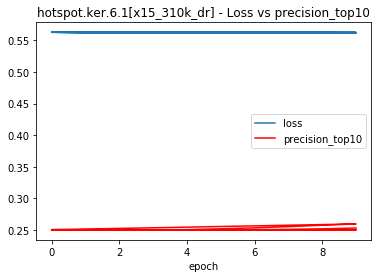

In [3]:
trainer = Trainer(modelID, datasetID, False); #true will load latest checkpoints

# trainer.train(Epochs= 500, BatchSize=32, Callbacks={'per_epoch':5}, Verbose= 1)

#save first epoch
trainer.train(Epochs= 10, BatchSize=32, Callbacks={'per_epoch': 1, 'csv_logger': 1, 'upload_history': 1, 'custom_callbacks': 'on_epoch_end'}, Verbose= 1)
trainer.plt_db_logs()

In [ ]:
trainer._MODEL.load_latest_checkpoihnbnt()
#trainer._MODEL._M.summary()

In [ ]:
for key in trainer._INFO['history'].history:
    print("{0}=>{1}".format(key, trainer._INFO['history'].history[key]))

In [ ]:
list = {};
list['a'] = 'A'
list['b'] = {'B': 'BB'}
list['b']['B']

##### k = Sequential()
k.add(LSTM(units=80, activation='relu', return_sequences=True, input_shape=(15,80)) ); #input_shape=(15,80) ));
k.add(LSTM(units=160, activation='relu'))
k.add(Dense(units=160, activation='relu'));
k.add(Dense(80, activation='sigmoid'));
k.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
k.summary()

In [ ]:
trainer._MODEL._M = k;
trainer.train(Epochs=10, BatchSize=100, Callbacks={'per_epoch':5})

#trainer._MODEL._D_X_SHAPE

In [ ]:
## Print tree structure of Data folder
#!apt-get install tree
!tree '../data/keno'

In [ ]:
dat = Dataset('keno_x15_25k_dr')
dat.load()
mod = Model('keno.ker.4.1.e0010',dat)
mod.load()
mod.print_summary()

## Training ground

In [ ]:
!python3 '../idataset.py'

datasetID = 'keno_x15_100k_dr'

d = Dataset(datasetID)
d.load();
dataset = d._D;

In [ ]:
import keras as kr
from keras.models import Sequential
from keras.layers import LSTM, Dense

!python3 '../imodel.py'
!python3 '../ker_model.py'
!python3 '../ker_model_loader.py'

modelID = 'keno.ker.4.11.0'

#Keno.ker.1.1
Model = KER_Model(modelID, d);
KER_Model_Loader(Model);

Model.save_untrained()
Model.print_summary();

In [ ]:
Model._M.fit(d._D['X'], d._D['Y'], epochs=10, verbose=1)

In [ ]:
kr.get_untrained_folder_path()

In [ ]:
%run 'idataset.py'

In [ ]:
cd ../

In [ ]:
import sys
sys.path.append('/content/g_drive/My Drive/Colab/Datascience/ai_lotto')

In [ ]:
from idataset import Dataset
d = Dataset('keno_x15_2.528m_dr')
d._FULL_PATH